In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
fp = "drive/MyDrive/Colab Notebooks/polbnda_ind.shp"
map_df = gpd.read_file(fp)
map_df.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((74.73719 37.02695 0.00000, 74.7445..."
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON Z ((73.13781 35.81256 0.00000, 73.1441..."
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((75.13574 34.89415 0.00000, 75.0727..."
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON Z ((74.18809 35.66722 0.00000, 74.2342..."
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((74.08553 35.07817 0.00000, 74.0961..."


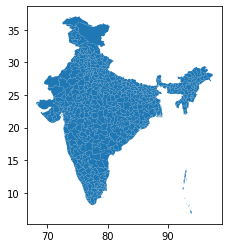

In [ ]:
map_df = map_df[['laa', 'geometry']]
map_df.plot()

In [ ]:
import numpy as np
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
dataset_url_cases = ["drive/MyDrive/Colab Notebooks/Cases/jan21_cases.csv","drive/MyDrive/Colab Notebooks/Cases/q1_cases.csv","drive/MyDrive/Colab Notebooks/Cases/q2_cases.csv",
               "drive/MyDrive/Colab Notebooks/Cases/q3_cases.csv"]
time_interval = ["January 2021","Feb-April 2021","May-July 2021","August-October 2021","November-December 2021"]

In [ ]:
def district_wise_plt(dataset,time):
  df = pd.read_csv(dataset)
  df['Districts'] = df['Districts'].str.upper()
  df_filtered= df[['Mean Cases', 'Districts']]
  
  df_merged = map_df.set_index('laa').join(df_filtered.set_index('Districts'))
  df_merged['Mean Cases'] = NormalizeData(df_merged['Mean Cases'])*100
  df_merged['Mean Cases'].fillna(df_merged['Mean Cases'].mean(), inplace=True)
  fig, ax = plt.subplots(1, figsize=(12, 8))

  ax.axis('off')
  ax.set_title('District Wise avg covid cases during '+time, fontdict={'fontsize': '14', 'fontweight' : '3'})
  
  return df_merged.plot(column="Mean Cases", cmap='YlOrRd', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)
AxesSubplot(0.294134,0.125;0.450866x0.755)


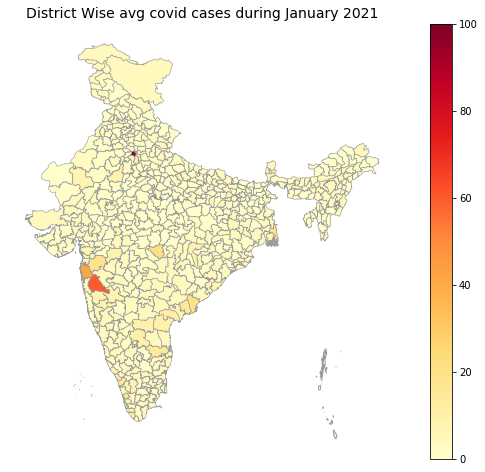

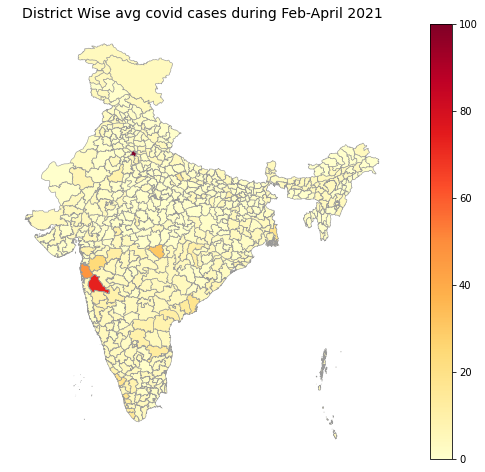

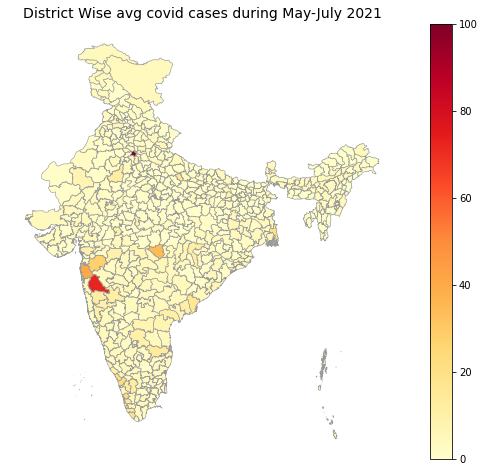

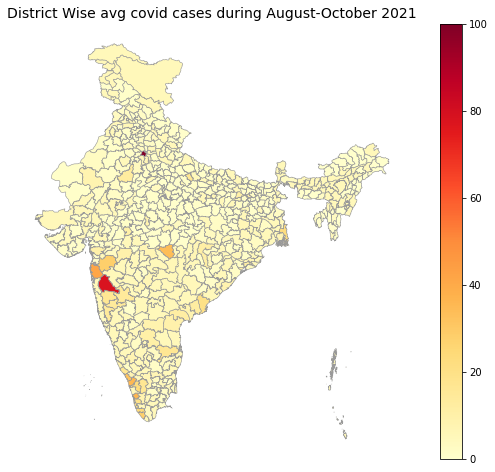

In [ ]:
for i in range(0,len(dataset_url_cases)):
    plot_map = district_wise_plt(dataset_url_cases[i],time_interval[i])
    print(plot_map)